In [1]:
import pandas as pd 
import numpy as np 

df = pd.read_csv('Merged02.csv')
df = pd.DataFrame(df)


<h2>Checking Null values

In [2]:
df.isnull().sum()  

Header_Length      0
Protocol Type      0
Time_To_Live       0
Rate               0
fin_flag_number    0
syn_flag_number    0
rst_flag_number    0
psh_flag_number    0
ack_flag_number    0
ece_flag_number    0
cwr_flag_number    0
ack_count          0
syn_count          0
fin_count          0
rst_count          0
HTTP               0
HTTPS              0
DNS                0
Telnet             0
SMTP               0
SSH                1
IRC                1
TCP                1
UDP                1
DHCP               1
ARP                1
ICMP               1
IGMP               1
IPv                1
LLC                1
Tot sum            1
Min                1
Max                1
AVG                1
Std                1
Tot size           1
IAT                1
Number             1
Variance           1
Label              1
dtype: int64

<h3>We do have some null values...

In [6]:
t=df.groupby('Label').sample(frac=0.1, random_state=42)
t

,Header_Length,Protocol Type,Time_To_Live,Rate,fin_flag_number,syn_flag_number,rst_flag_number,psh_flag_number,ack_flag_number,ece_flag_number,...,Tot sum,Min,Max,AVG,Std,Tot size,IAT,Number,Variance,Label
1099,32.0,6,113.7,104.341631,0.0,0.0,0.0,0.1,1.0,0.0,...,7990.0,66.0,1514.0,799.0,754.153683,799.0,0.009593,10.0,568747.777778,BENIGN
0,32.0,6,114.0,3976.020476,0.0,0.0,0.0,0.0,1.0,0.0,...,9348.0,66.0,1514.0,934.8,747.743985,934.8,0.000306,10.0,559121.066667,BENIGN
1190,32.0,6,64.0,1944.327832,0.0,0.0,0.0,0.0,1.0,0.0,...,15140.0,1514.0,1514.0,1514.0,0.000000,1514.0,0.000531,10.0,0.000000,BENIGN
421,46.0,6,93.5,15875.488266,0.0,0.0,0.0,0.1,1.0,0.0,...,7780.0,94.0,1462.0,778.0,720.999307,778.0,0.000069,10.0,519840.000000,BENIGN
266,32.0,6,214.3,1930.101698,0.0,0.0,0.0,0.1,1.0,0.0,...,750.0,66.0,156.0,75.0,28.460499,75.0,0.000518,10.0,810.000000,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1270,32.0,6,247.0,1946.312761,0.0,0.0,0.0,0.8,1.0,0.0,...,14982.0,1494.0,1500.0,1498.2,2.898275,1498.2,0.000573,10.0,8.400000,MITM-ARPSPOOFING
2778,16.4,17,104.2,55.036715,0.0,0.0,0.0,0.3,0.4,0.0,...,1438.0,60.0,345.0,143.8,111.821087,143.8,0.021295,10.0,12503.955556,RECON-OSSCAN
103,20.8,6,70.5,64.553178,0.0,0.1,0.0,0.3,0.4,0.0,...,1197.0,66.0,262.0,119.7,69.168153,119.7,0.018918,10.0,4784.233333,VULNERABILITYSCAN
859,21.6,6,79.3,880.730739,0.0,0.4,0.4,0.0,0.5,0.0,...,903.0,60.0,357.0,90.3,93.727797,90.3,0.001145,10.0,8784.900000,VULNERABILITYSCAN


In [8]:
print(t['Label'].value_counts(),df['Label'].value_counts())

Label
DDOS-ICMP_FLOOD            48
DDOS-UDP_FLOOD             34
DDOS-TCP_FLOOD             30
DDOS-PSHACK_FLOOD          26
DDOS-SYN_FLOOD             26
DDOS-RSTFINFLOOD           24
DDOS-SYNONYMOUSIP_FLOOD    24
DOS-UDP_FLOOD              18
DOS-TCP_FLOOD              15
DOS-SYN_FLOOD              14
MIRAI-GREETH_FLOOD          8
BENIGN                      8
MIRAI-UDPPLAIN              7
MIRAI-GREIP_FLOOD           4
DDOS-ICMP_FRAGMENTATION     3
VULNERABILITYSCAN           3
MITM-ARPSPOOFING            3
DDOS-ACK_FRAGMENTATION      2
DDOS-UDP_FRAGMENTATION      1
DNS_SPOOFING                1
RECON-OSSCAN                1
Name: count, dtype: int64 Label
DDOS-ICMP_FLOOD            479
DDOS-UDP_FLOOD             335
DDOS-TCP_FLOOD             298
DDOS-PSHACK_FLOOD          261
DDOS-SYN_FLOOD             255
DDOS-RSTFINFLOOD           239
DDOS-SYNONYMOUSIP_FLOOD    239
DOS-UDP_FLOOD              185
DOS-TCP_FLOOD              150
DOS-SYN_FLOOD              136
MIRAI-GREETH_FLOOD    

In [6]:
from sklearn.model_selection import train_test_split 
X=df.drop(columns='Label',axis=1)
y=df['Label']

<h2>Visualization of data

In [10]:
df.columns

Index(['Header_Length', 'Protocol Type', 'Time_To_Live', 'Rate',
       'fin_flag_number', 'syn_flag_number', 'rst_flag_number',
       'psh_flag_number', 'ack_flag_number', 'ece_flag_number',
       'cwr_flag_number', 'ack_count', 'syn_count', 'fin_count', 'rst_count',
       'HTTP', 'HTTPS', 'DNS', 'Telnet', 'SMTP', 'SSH', 'IRC', 'TCP', 'UDP',
       'DHCP', 'ARP', 'ICMP', 'IGMP', 'IPv', 'LLC', 'Tot sum', 'Min', 'Max',
       'AVG', 'Std', 'Tot size', 'IAT', 'Number', 'Variance', 'Label'],
      dtype='object')

<Axes: >

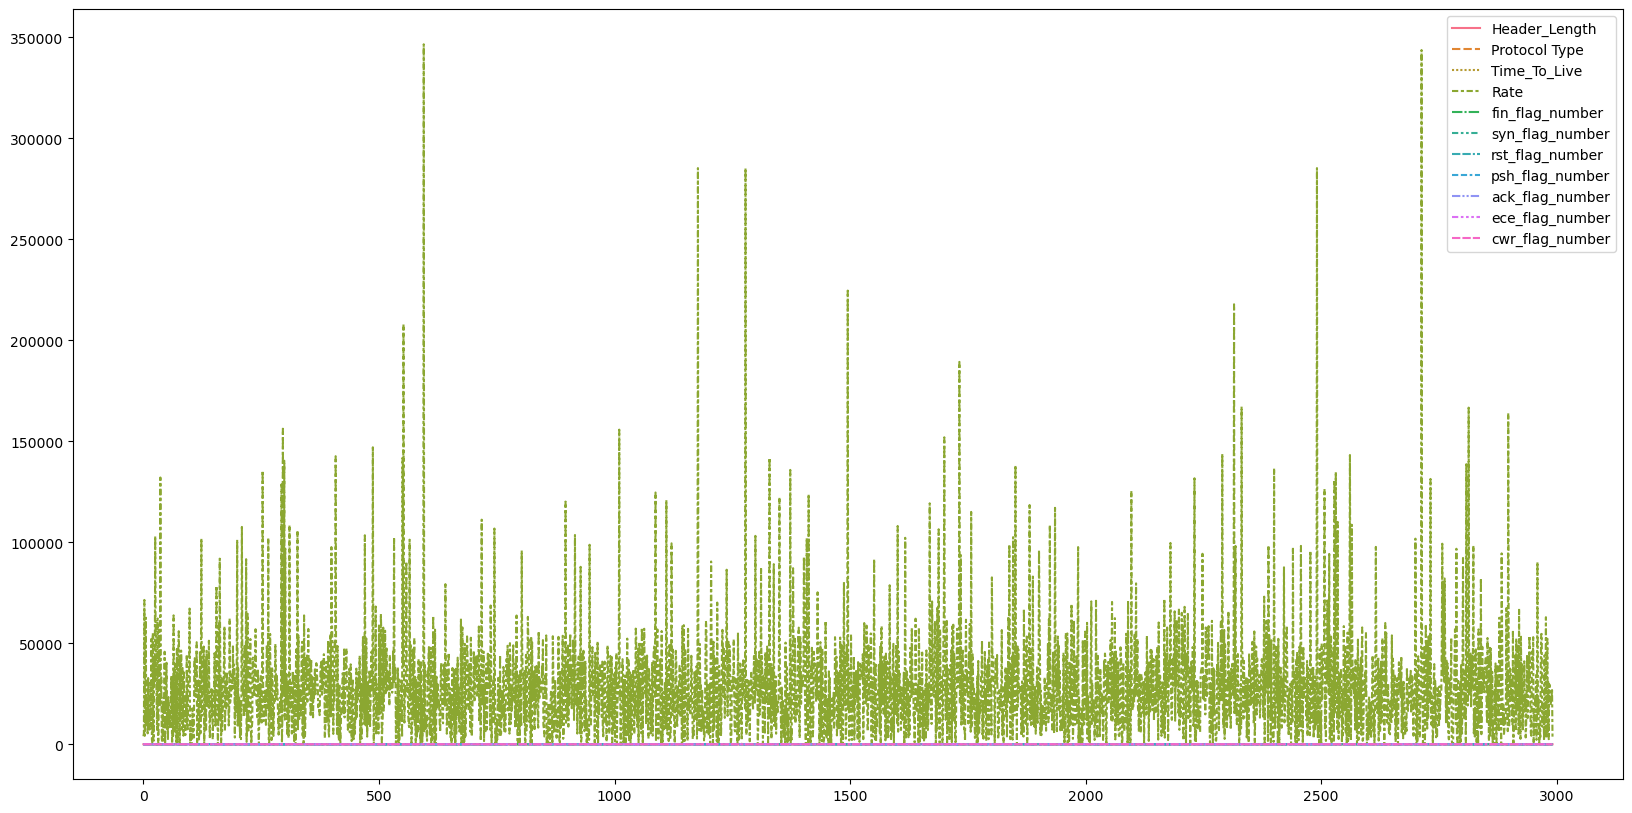

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt 

plt.figure(figsize=(20,10))
sns.lineplot(data=df[['Header_Length', 'Protocol Type', 'Time_To_Live', 'Rate',
       'fin_flag_number', 'syn_flag_number', 'rst_flag_number',
       'psh_flag_number', 'ack_flag_number', 'ece_flag_number',
       'cwr_flag_number']])


<Axes: >

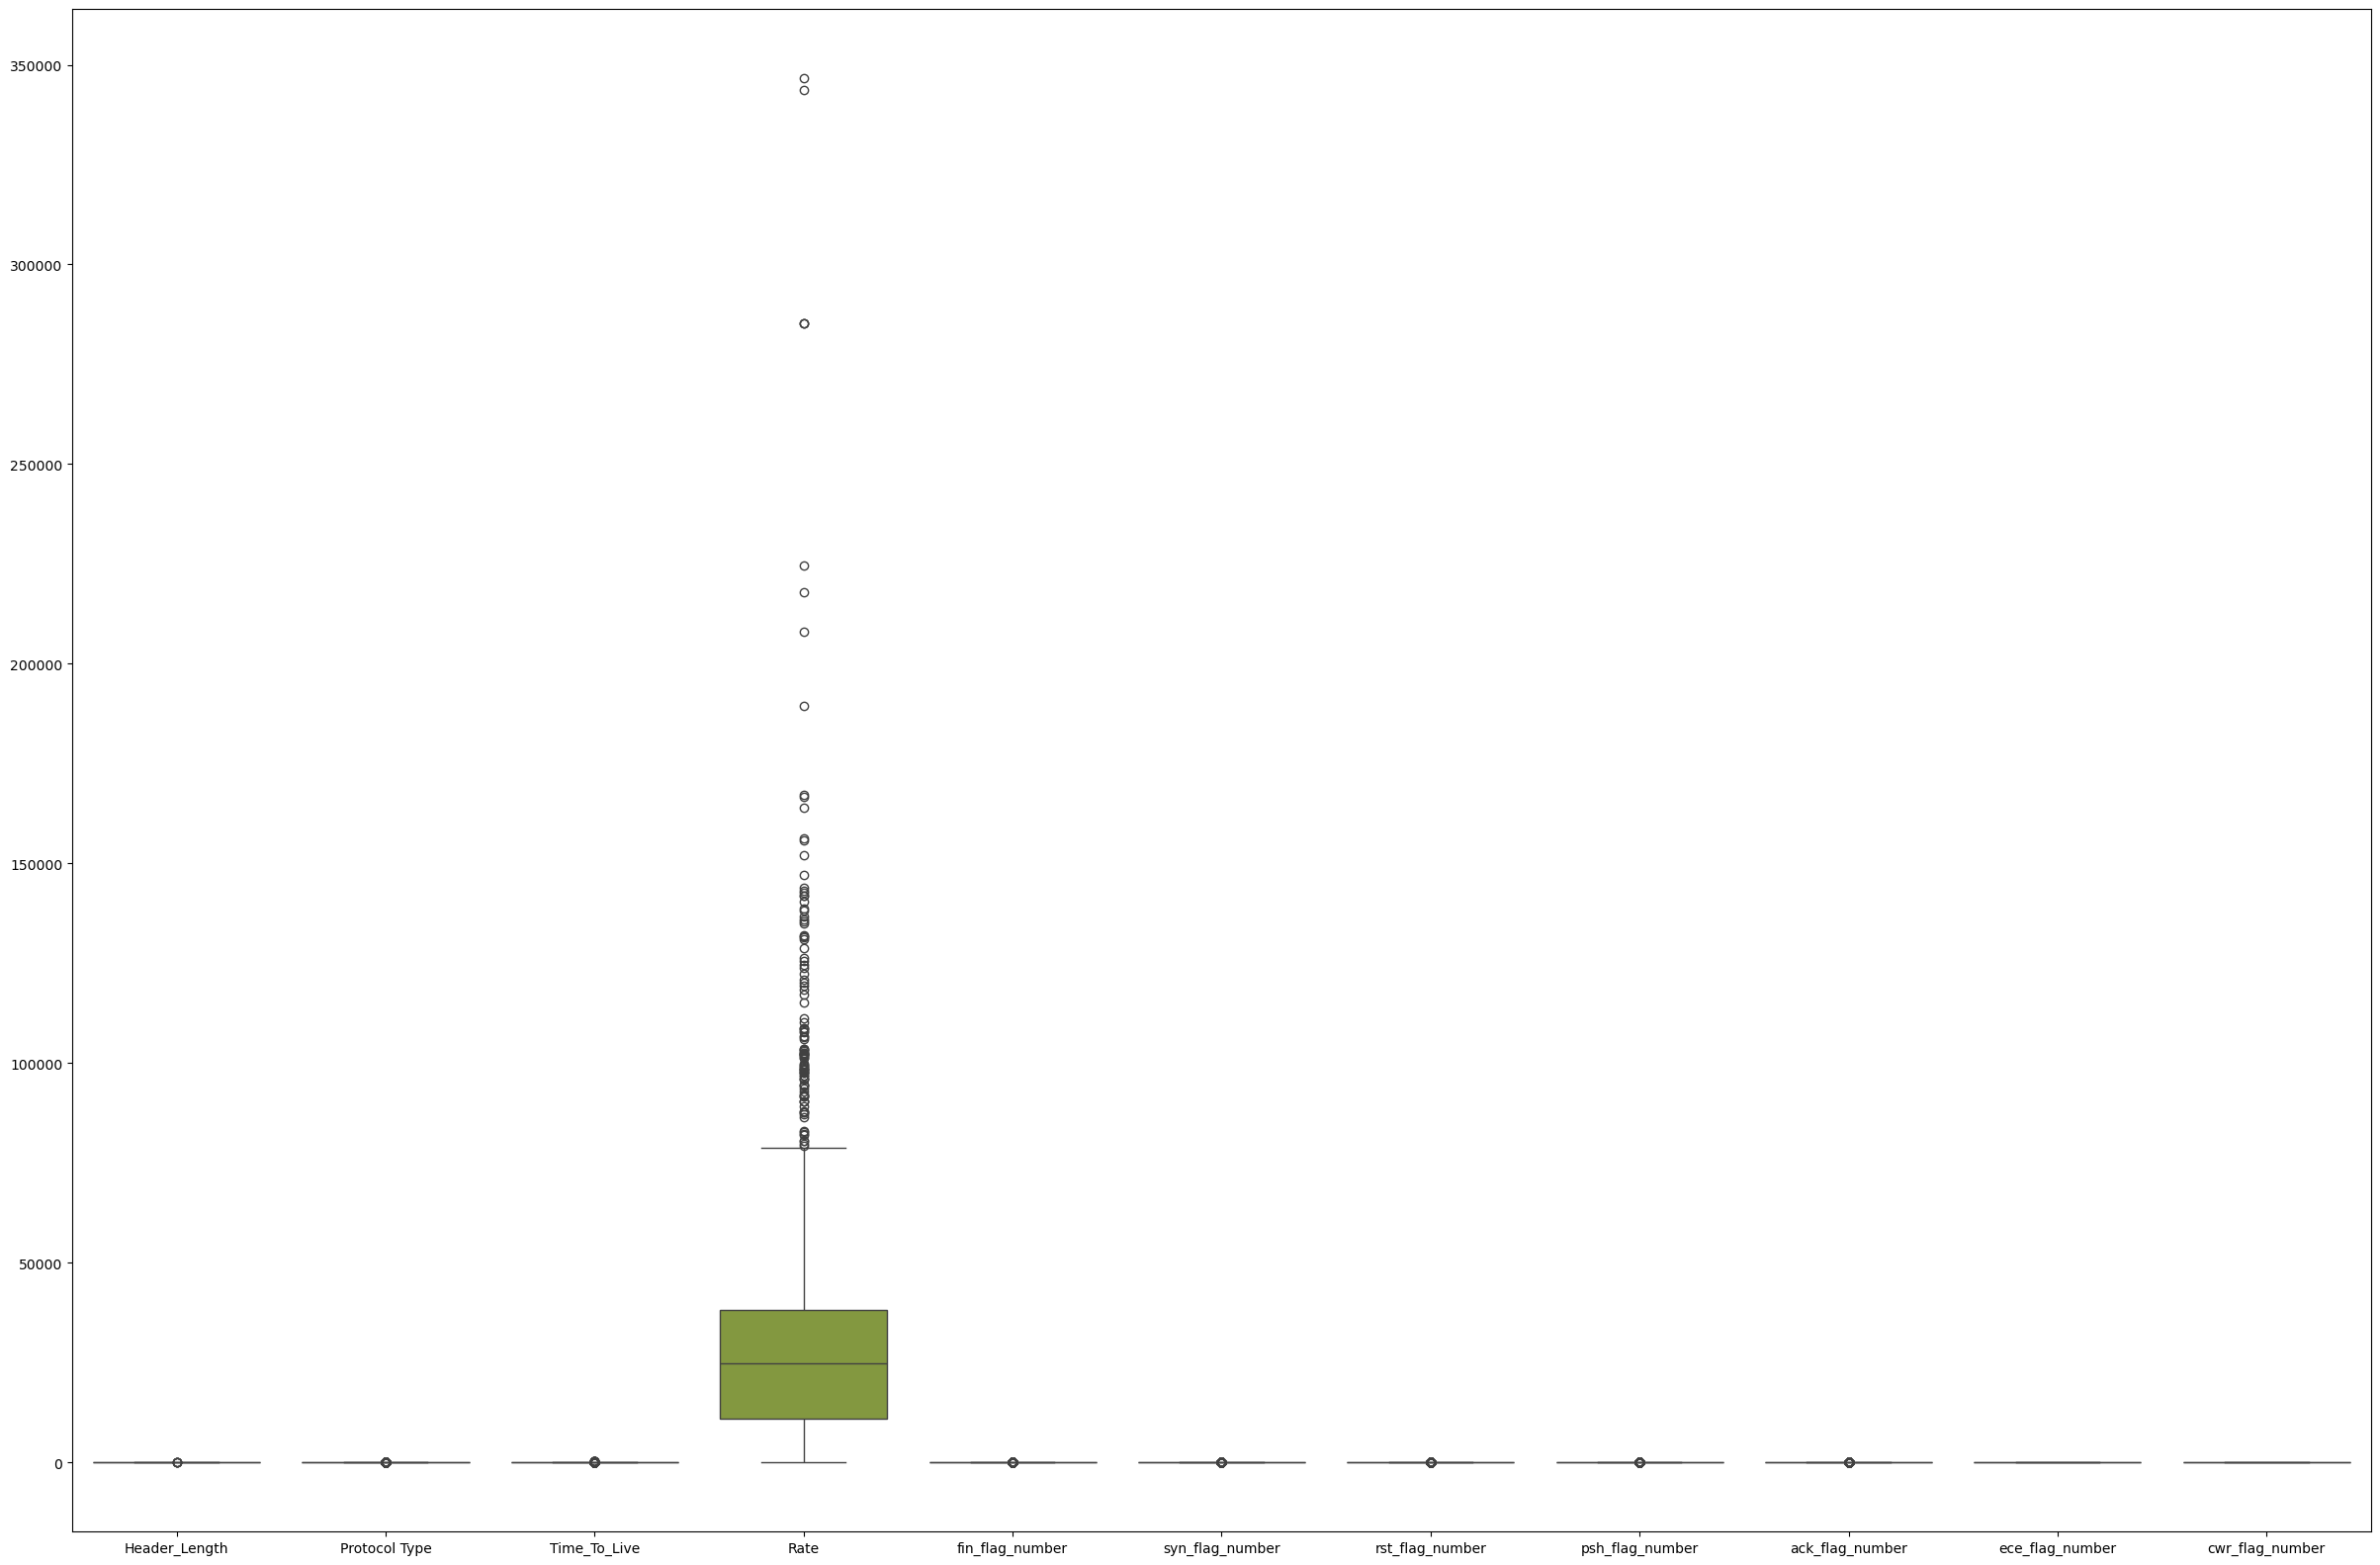

In [17]:
plt.figure(figsize=(30,20))
sns.boxplot(df[['Header_Length', 'Protocol Type', 'Time_To_Live', 'Rate',
       'fin_flag_number', 'syn_flag_number', 'rst_flag_number',
       'psh_flag_number', 'ack_flag_number', 'ece_flag_number',
       'cwr_flag_number']])

<h4>We can see in above graph we have alot of outliers in Rate, generally we remove outlier but this time these outliers are our target it tells these are the attack on IoT devices. We need to use Robust scaling techniques to make sure our dataset is not effected 

<h3>Encoding the Categorical feature which is target label in this case using OneHotEncoding can create large dimention as we have 33 types of attacks in target label which may be will cause us computational cost Still we do multiple types of encoding and check which performs better.

In [19]:
df['Label'].isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
2987    False
2988    False
2989    False
2990    False
2991     True
Name: Label, Length: 2992, dtype: bool

In [29]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
Categorical_pipeline =Pipeline(
    [
        ('SimpleImputer',SimpleImputer(strategy='most_frequent')),
        ('OneHotEncoding',OneHotEncoder(handle_unknown='ignore')),
    ]
)



In [24]:
from sklearn.preprocessing import RobustScaler

Numeric_pipeline = Pipeline(
    [
        ('SimpleImputer',SimpleImputer(strategy='mean')),
        ('RobustScaler',RobustScaler())
    ]
)

In [28]:
from sklearn.compose import ColumnTransformer

column= ColumnTransformer(
    [
        ('numerical_pipeline',Numeric_pipeline),
        ('categorical_pipeline',Categorical_pipeline)
    ]
)

In [ ]:
from 

In [ ]:
#preprocessing 
#handle missing values
#Normalization
#